# Graphical analysis of the American Community Survey


The American Community Survey (ACS) is a large survey of households
and individuals in the United States, carried out by the US
government on a continuous basis (around 3.5 million people are
contacted per year).  It is arguably the most authoritative source
of information about the demographic composition of the US
population, and is used for many purposes in academic research,
government, public policy, and in private industry.

Some of the questions in the ACS are about sensitive topics, and therefore are only released in aggregate form. The "public use microsample" (PUMS) is a set of individual ACS responses that only includes information that has been deemed safe for public release at the individual level. Here we will work with a subset of the ACS/PUMS data.

You will need to refer to the documentation to know what the ACS variable names mean: **[ACS PUMS Codebooks](https://www.census.gov/programs-surveys/acs/microdata/documentation/2018.html)** Scroll down for data dictionary 2018 "1-year" ACS/PUMS, available in several formats.

For this course, we are providing a simplified version of the ACS/PUMS data from 2018. It contains a random subset of the cases and a selected subset of variables.

Note that many PUMS variables are described as being "household" or "individual" variables. These refer to characteristics of households (one or more people living at the same address) or to characteristics of individual people, respectively.

As usual we will start by loading our data science libraries.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
try:
    df = pd.read_csv("./pums_short.csv.gz")
except FileNotFoundError:
    df = pd.read_csv("./labs/lab04/pums_short.csv.gz")

## Getting to know the data


As we typically do, find out the size of the data set and what the columns are called.

In [4]:
print(df.columns)
print(df.shape)

Index(['DIVISION', 'PUMA', 'REGION', 'ST', 'NP', 'MRGP', 'RNTP', 'TEN', 'VALP',
       'VEH', 'YBL', 'FES', 'FINCP', 'FPARC', 'HHT', 'HINCP', 'HUPAC', 'MV',
       'NOC', 'NPF', 'NR', 'NRC', 'PARTNER', 'R18', 'R60', 'R65', 'TAXAMT',
       'WIF', 'WKEXREL', 'WORKSTAT', 'FFINCP'],
      dtype='object')
(276632, 31)


<details>

```
print(df.columns)
print(df.shape)
```

</details>


## Discrete Distributions 

The `value_counts` method is a useful way to summarize the distribution of a discrete variable. For example, did this survey capture the same number of people across each region?

In [6]:
same_num_people = df['REGION'].value_counts()
print(same_num_people)

REGION
3    106334
4     60822
2     60622
1     48854
Name: count, dtype: int64


<details>

```
df["REGION"].value_counts().sort_index()
```

</details>

What did you notice about the distribution of survey respondents across regions? 

Notice here that the regions are numbered 1-4, which corresponds to the Northeast, Midwest, South, and West (respectively). Even though the regions
are numbered, the numbers are unimportant, and so it is important to think
of this as categorical data, not numeric. 

<Axes: xlabel='REGION', ylabel='count'>

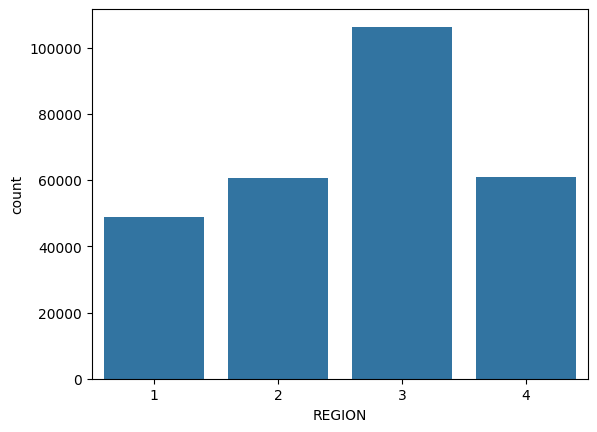

In [7]:
sb.barplot(df["REGION"].value_counts())

What about values that are also categorical, but have a distinct order? For example, let's look at the year that a household living structure was built,
`YBL`. Find the distribution of the YBL values.

Hint: You can use the `sort_index` method to sort the output of the `value_counts` method.

<Axes: xlabel='YBL'>

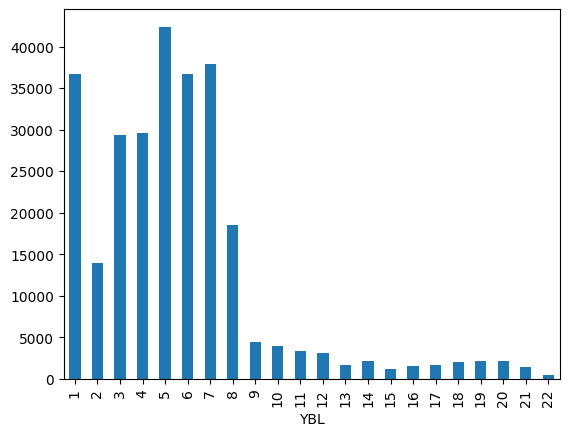

In [11]:


df["YBL"].value_counts().sort_index().plot(kind='bar')

<details>

```
df["YBL"].value_counts().sort_index()
```

</details>

But what do these numbers mean? Let's look at the codebook.


| Code  | Description     |
| ----- | --------------- | 
| 1     | 1939 or earlier |
| 2     | 1940 to 1949    |
| 3     | 1950 to 1959    |
| 4     | 1960 to 1969    |
| 5     | 1970 to 1979    |
| 6     | 1980 to 1989    |
| 7     | 1990 to 1999    |
| 8     | 2000 to 2004    |
| 9     | 2005            |
| 10    | 2006            |
| 11    | 2007            |
| 12    | 2008            |
| 13    | 2009            |
| 14    | 2010            |
| 15    | 2011            |
| 16    | 2012            |
| 17    | 2013            |
| 18    | 2014            |
| 19    | 2015            |
| 20    | 2016            |
| 21    | 2017            |
| 22    | 2018            |

Despite the fact the numeric codes increase by 1 each time, early codes represent multiple years, including up to an entire decade of construction.
However, later codes represent a single year. 

## Cumulative Proportions

Despite the fact that the ordinal variables are not strictly numeric, we can still use them to gauge how recently dwelling structures
have been built. We can do this by using the `cumsum` function after ordering the values.

We're also going to do a little bit of cleaning to make our lives easier.

In [12]:
data_labels = {
    1: "1939 or earlier",
    2: "1940 to 1949",
    3: "1950 to 1959",
    4: "1960 to 1969",
    5: "1970 to 1979",
    6: "1980 to 1989",
    7: "1990 to 1999",
    8: "2000 to 2004",
    9: "2005",
    10: "2006",
    11: "2007",
    12: "2008",
    13: "2009",
    14: "2010",
    15: "2011",
    16: "2012",
    17: "2013",
    18: "2014",
    19: "2015",
    20: "2016",
    21: "2017",
    22: "2018",
}

In [13]:
sorted_counts = pd.concat([
    df["YBL"].value_counts(),
    df["YBL"].value_counts(normalize=True)
], axis=1).sort_index().rename(index=data_labels)
sorted_counts

,count,proportion
YBL,,
1939 or earlier,36705,0.132685
1940 to 1949,13967,0.050489
1950 to 1959,29428,0.106380
1960 to 1969,29583,0.106940
1970 to 1979,42379,0.153196
1980 to 1989,36754,0.132862
1990 to 1999,37938,0.137142
2000 to 2004,18558,0.067086
2005,4411,0.015945


We now have the human readable labels along with our counts, as well as the percentage of dwellings in each category.

Already, we see some interesting information. For example, roughly 13% of ACS respondents live in a house that was built prior to 1939! 
To get a cumulative look at the data, however, we need to use the `cumsum` function that we saw in lecture.

In [14]:
sorted_counts.cumsum()

,count,proportion
YBL,,
1939 or earlier,36705,0.132685
1940 to 1949,50672,0.183175
1950 to 1959,80100,0.289554
1960 to 1969,109683,0.396494
1970 to 1979,152062,0.549691
1980 to 1989,188816,0.682553
1990 to 1999,226754,0.819695
2000 to 2004,245312,0.886781
2005,249723,0.902726


Use this table to answer the following questions:

1. What percentage of dwellings were built **prior** to 2008?
2. Is it possible to accurately say What percentage of dwellings were built **before** 1995? Why or why not?

Next, let's see how to this without the preconstructed table.
Suppose we ask the same questions, 1 and 2. How could we solve without the cumulative sum?

1~ Below
2~ nobecause the first few rows are in a twn year range and we don't have the exact amount for each hyear specifically

<Axes: xlabel='YBL'>

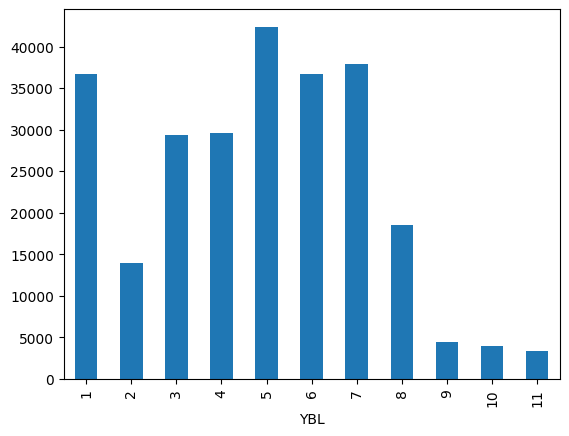

In [17]:
built_prior_to_2008 = df[df["YBL"] < 12]
built_prior_to_2008["YBL"].value_counts().sort_index().plot(kind='bar')


In [7]:
(df["YBL"] < 12).mean()

np.float64(0.9294152520315798)

We used `12` as the value because that group corresponds to 2008 (hint: you need to check the `data_labels` object we constructed from the codebook!). We then
take the mean, since for boolean (true/false) values, this is equivalent
to finding the proportion that satisfy our condition. The key here is to remember to tie your 
ordinal group with the correct index in the `data_labels` dictionary.

Cumulative proportions have a very important property - the maximum value is **always 1.** This is because **proportions are always between 0 and 1**. 
Try finding the percentage of dwelllings built before the year 2000, and check your answer against the table above. Remember, if you get a number less
than 0 or greater than 1, we know the answer is incorrect.


In [23]:
before_2000 = (df["YBL"] <= 7).mean()
after_2000 = (df["YBL"] > 7).mean()
print(before_2000, after_2000)

0.8196954799155557 0.1803045200844443


<details>

```
(df["YBL"] <= 7).mean()
```

</details>

Now try finding the opposite - the percentage of dwellings built after and including 2008. Hint: the opposite of ">" is "<=".

In [26]:
after_2008 = (df["YBL"] >= 8).mean()
after_2008

np.float64(0.1803045200844443)

<details>

```
(df["YBL"] > 7).mean()

# also 
(df["YBL"] >= 8).mean()

# and also
1 - (df["YBL"] <= 7).mean()
```

</details>

## Boxplots and histograms

A boxplot is a way to visualize a distribution. Below we create a boxplot for the household income variable in the ACS.

<Axes: xlabel='HINCP'>

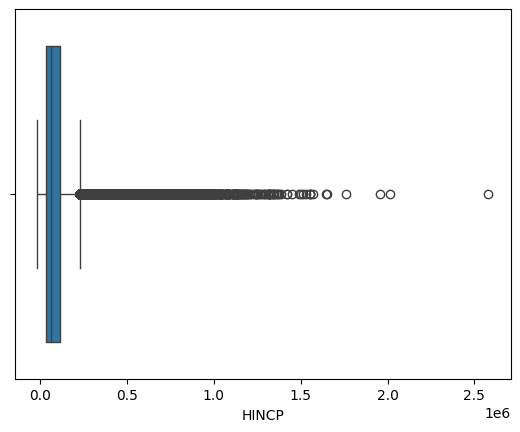

In [27]:
sb.boxplot(x = "HINCP", data = df)

The data are very skewed, which is a common property of income data.  Skew is not a bad thing, but it is an important characteristic of the data to be aware of.

Let's zoom in on the box:

<Axes: xlabel='HINCP'>

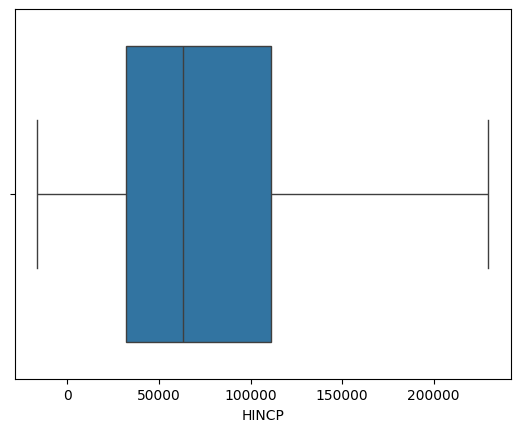

In [28]:
sb.boxplot(x = "HINCP", showfliers = False, data=df)

Use the box plot above to describe the **central tendancy** (middle of the data) and **spread** (how tighly clustered are the data around the middle) and **skew** (the amount of spread on each side of the central tendency)
of household income in this data set.

central tendency~ the data within the box seems to be close together but there's long whiskers on both sides of the box so the data seems to be stretched

spread~ the data in the box seems to be spread somewhat even in the box

skew~ there seems to be slightly less data on the left side of the quartile 2 line but its close to being even 

Create a boxplot for the `NP` variable. Describe the central tendency, spread, and skew.

<Axes: xlabel='NP'>

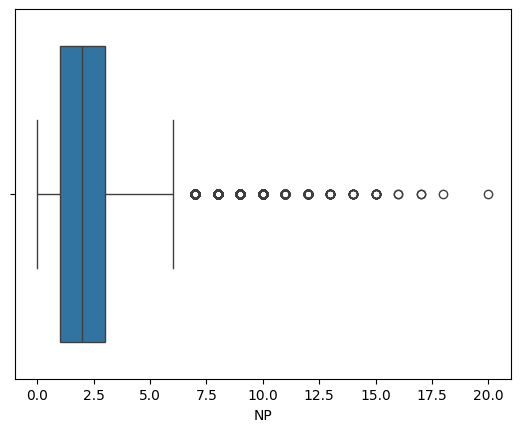

In [30]:
sb.boxplot(data = df, x = "NP")


<details>

```
sb.boxplot(data = df, x = "NP")
```

</details>

A histogram is another way to visualize a distribution. It requires more data to produce an accurate histogram than it does to produce an accurate boxplot, but in this case we have plenty of data so either approach is useful.  There are various ways to decide how many bins to use when creating a histogram.  Here we set this value manually to have 20 bins.

<Axes: xlabel='HINCP', ylabel='Count'>

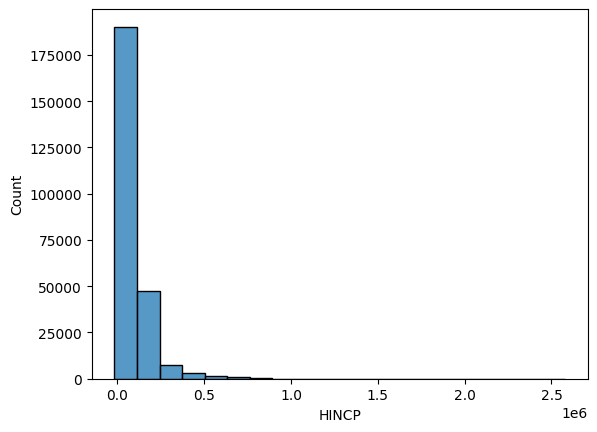

In [10]:
sb.histplot(data = df, x = "HINCP", bins = 20)

Create a histogram with 100 bins. What changed in your plot? Which plot do your prefer?

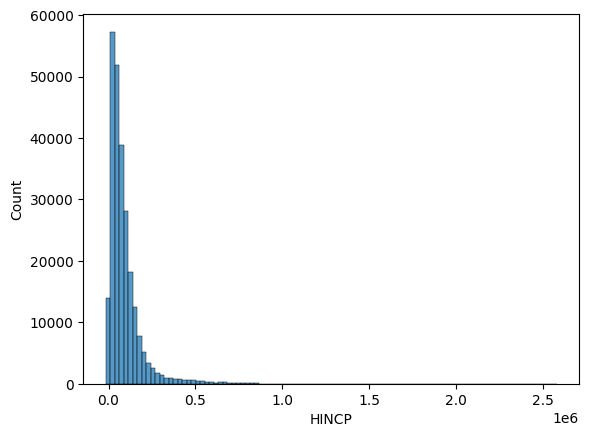

In [31]:
hist = sb.histplot(data = df, x = "HINCP", bins = 100)
#this shows the distribution better

<details>

```
sb.histplot(data = df, x = "HINCP", bins = 100)
```
</details>

In the above histograms we notice **strong right skew**. One way to tame skew is to a **logarithmic transformation**. A logarithm solves $b^c = a$ for $c$. We write $\log_b(a) = c$. Here, we'll use $b = 2$. The `numpy` library has a function we can use to compute the base two logarithms.

Let's log transform the data. Logs are not defined for non-postive values, so we will replace (or "clip") data below 1 to have the value 1.

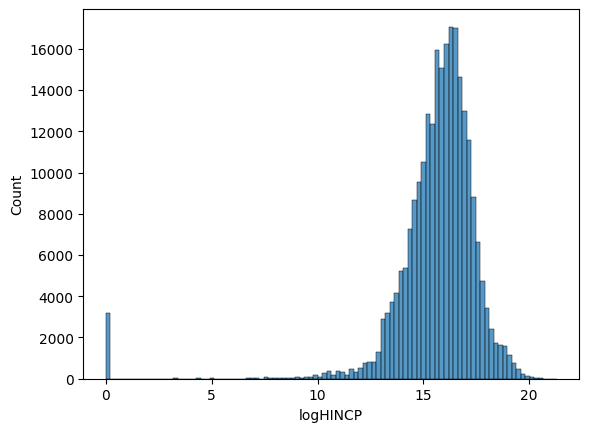

In [34]:
import numpy as np
df["logHINCP"] = np.log2(df["HINCP"].clip(1))
hist = sb.histplot(data = df, x = "logHINCP", bins = 100)

Log transformations help tame skew. Skew isn't necessarily bad and is not something that always must be removed.  But in general it is easier to analyze data that has been transformed to reduce the skew.

Create a box plot for the log transformed data.

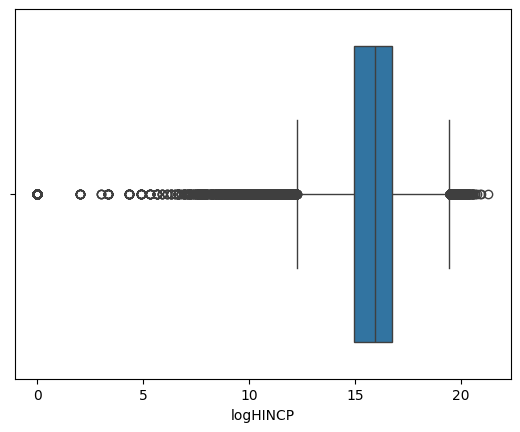

In [35]:
box = sb.boxplot(data = df, x = "logHINCP")

<details>

```
sb.boxplot(data = df, x = "logHINCP")
```

</details>

Now create a histogram of the log transformed income data. Use 100 bins. Write a few words describing the central tendency, spread and skew visible in this plot.

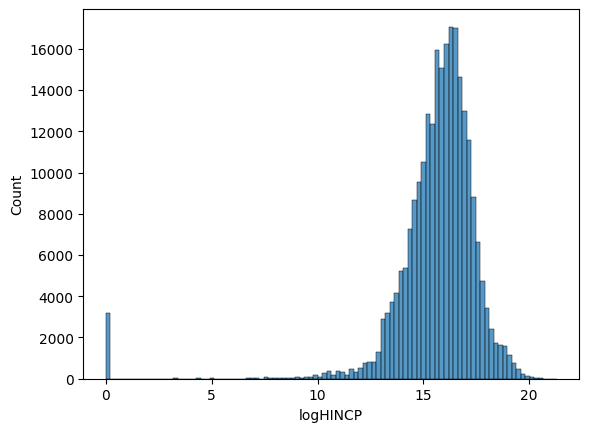

In [36]:
hist = sb.histplot(data = df, x = "logHINCP", bins = 100)

<details>

```
sb.histplot(data = df, x = "logHINCP", bins = 100)
```

</details>
    
In the plot we see the central tendency is around 15 to 17 (on the log base 2 dollar scale). Most observations fall in teh range 10 to 20. There is not much skew, but we do see a spike at 0 that represents the observations we clipped to 1. (Why is is $\log_b(1) = 0$ for any $b$?)
    


## Cumulative Proportions 

Previously, we saw a cumulative distribution for ordinal variables. However,
cumulative proportions can be created for continuous variables as well, and in exactly the same way.
To demonstrate, let's look at income data again. What percentage of households had an
income greater than $100,000?

In [37]:
(df["HINCP"] >= 100000).mean()

np.float64(0.27117614737268286)

What percentage of households had an income **between** $25,000 and $75,000?

In [40]:
percentage_between = ((df["HINCP"] >= 25000) & (df["HINCP"] <= 75000)).mean()
percentage_between

np.float64(0.355428873015414)

<details>

```
(df["HINCP"].between(25000, 75000)).mean()
# or 
((df["HINCP"] >= 25000) & (df["HINCP"] <= 75000)).mean()
```

</details>


## Cumulative Proportions and Groups

Some of the most interesting questions in data science arise from proportions and means within groups
of interest. To review grouping, let's start with a simple  question: what's the average number of people in a household
in each region? Try it on your own, and then check your answer below.

In [43]:
avg_num_people = df.groupby("REGION")["NP"].mean()
avg_num_people

REGION
1    2.196483
2    2.163291
3    2.144272
4    2.376706
Name: NP, dtype: float64

<details>

```
df.groupby("REGION")["NP"].mean()
```

</details>

There is a small difference, but it may seem
unclear whether this is the result is different enough
to say that there is a real or practical difference across the regions. Keep this in mind - we're going to talk about this later in the course!

For now though, after recalling how we do groupings, let's ask a new question: is the proportion of 
households with an income greater than $100,000 different across regions? This is a slightly different question, as it
requires cumulative proportions within a region. With a bit 
of adjusted code, we can aswer this question.

In [44]:
regions = {1: "Northeast", 2: "Midwest", 3: "South", 4: "West"}

income_proportions = (
    (df["HINCP"] >= 100000) # create boolean values for income >= $100k/yr
    .groupby(df["REGION"])  # next, group by the region
    .mean() # take the mean of the boolean values for each region
    .rename(regions) # rename the regions to a human-readble names
)
print(income_proportions)

REGION
Northeast    0.324334
Midwest      0.234469
South        0.240337
West         0.318980
Name: HINCP, dtype: float64


In [47]:
before_1993 = (df["YBL"] <= 5).groupby(df["REGION"]).mean()
before_1993


REGION
1    0.705387
2    0.635594
3    0.448822
4    0.515356
Name: YBL, dtype: float64

Notice the differences with the grouping code from earlier,
but this style still works. Here, we pass the grouping
variable as an argument to the groupby method instead
of calling it directly on the dataframe, but the results 
are the same.

Writing the code for these styles of queries can be tricky, so feel free to ask CoPilot for help! 

When we run this, we see that the proportions are indeed different across the regions. Let's try another one: does the age of dwellings differ across regions? What proportions of dwellings were built BEFORE 1939 in each region?

<details>

```
(
    (df["YBL"] == 1) 
    .groupby(df["REGION"])  
    .mean() 
    .rename(regions) 
)
```

</details>

You should be a big difference between the Northeast and Midwest vs. the South and the West. Think about the history of the US - does the data match 
your intuition?

Practice a bit on your own with cumulative proportions and grouping, and
try to use variables we haven't explored yet. 
Feel free to look through the codebook to find a variable that interests you. If you stumble on the coding syntax,
don't hesitate to ask for help! Pandas is a powerful tool, but it can be tricky to learn at first.